In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# 한글 폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 설정, 확인
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

font_location = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [2]:
welfare = pd.read_csv('welfare_03.csv')
welfare

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종,지역,나이,연령별
0,0,0,0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년
1,1,1,1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년
2,2,2,2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년
3,3,3,3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년
4,4,4,4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,16586,16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년
16587,16587,16587,16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년
16588,16588,16588,16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년
16589,16589,16589,16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년


In [3]:
# < 4. 연령대별 월급 차이2 >
# 1) 변수 검토 및 전처리(연령대, 월급)
# 1-1) 연령대 변수 전처리(나이 변수를 사용)
# 연령대의 구분: 20대(20~29), 30대(30~39), 40대(40~49), 50(50~59), 60대(60~69), 70대(70~79), 80대(80~89)
# 20세 미만, 90세 이상(NA 처리)

# 연령대를 7개 그룹으로 생성
welfare = welfare.assign(연령대 = np.where(welfare['나이']<20, np.nan,
                                 np.where(welfare['나이']<30, '20대',
                                 np.where(welfare['나이']<40, '30대',
                                 np.where(welfare['나이']<50, '40대',
                                 np.where(welfare['나이']<60, '50대',
                                 np.where(welfare['나이']<70, '60대',
                                 np.where(welfare['나이']<80, '70대',
                                 np.where(welfare['나이']<90, '80대', np.nan)))))))))
welfare

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종,지역,나이,연령별,연령대
0,0,0,0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,1,1,1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,2,2,2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,3,3,3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,4,4,4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,16586,16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,16587,16587,16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,16588,16588,16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,nan
16589,16589,16589,16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대


In [4]:
# 문자열 nan을 결측치 NaN으로 변경
welfare['연령대'] = welfare['연령대'].replace('nan', 'NaN')
welfare

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종,지역,나이,연령별,연령대
0,0,0,0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,1,1,1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,2,2,2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,3,3,3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,4,4,4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,16586,16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,16587,16587,16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,16588,16588,16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN
16589,16589,16589,16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대


In [5]:
# 확인
welfare['연령대'].value_counts()

연령대
70대    2699
60대    2575
NaN    2411
80대    2196
50대    2076
40대    1910
20대    1381
30대    1343
Name: count, dtype: int64

In [6]:
welfare['연령대'].isna().sum()

0

In [7]:
# 1-2) 월급 변수 확인
welfare['월급'].dtype # dtypes('float64')

dtype('float64')

In [8]:
# 결측치 아닌값의 개수: 5633
# 월급의 범위: 0 ~ 2017, 평균: 275(만원), 중앙값: 236(만원)
welfare['월급'].describe()

count    5633.000000
mean      275.647080
std       214.807673
min         0.000000
25%       125.000000
50%       236.000000
75%       363.000000
max      2017.000000
Name: 월급, dtype: float64

In [9]:
ageg2_income = welfare.dropna(subset=['월급', '연령대']) \
                    .groupby('연령대', as_index=False) \
                    .agg(평균월급=('월급', 'mean'))
ageg2_income

,연령대,평균월급
0,20대,226.533003
1,30대,324.901472
2,40대,384.272801
3,50대,356.465013
4,60대,227.810939
5,70대,76.680328
6,80대,34.648734
7,NaN,75.222222


<Axes: xlabel='연령대', ylabel='평균월급'>

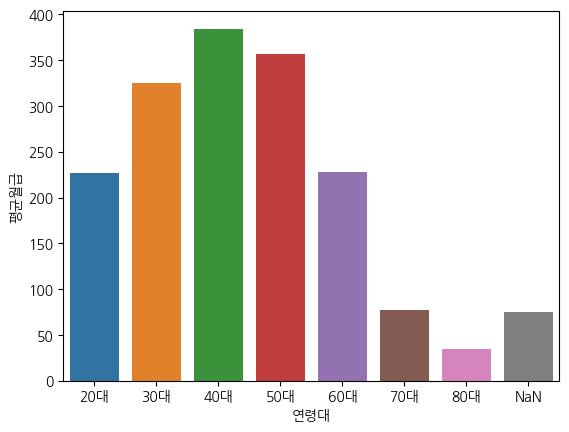

In [10]:
# 3) 시각화(barplot)
sns.barplot(data=ageg2_income, x='연령대', y='평균월급')

In [ ]:
# 4) 분석 결과
# 20대: 226만원, 30대: 324만원, 40대: 384만원, 50: 356만원, 60대 227만원,
# 70대: 76만원, 80대: 34만원의 평균 월급을 받고 있다는 것을 알 수 있다.

In [11]:
welfare.to_csv('welfare_04.csv')

In [13]:
welfare = pd.read_csv('welfare_04.csv')
welfare

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종,지역,나이,연령별,연령대
0,0,0,0,0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,1,1,1,1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,2,2,2,2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,3,3,3,3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,4,4,4,4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,16586,16586,16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,16587,16587,16587,16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,16588,16588,16588,16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN
16589,16589,16589,16589,16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대
